# iFood Advanced Data Analyst Case
## Introduction

iFood, the leading food delivery app in Brazil, is present in over a thousand cities. The company aims to maintain high customer engagement to solidify its market leadership. This case study presents a sample dataset that simulates customer meta-information and interactions with iFood campaigns. The goal is to analyze the data, uncover business opportunities and insights, and propose data-driven actions to optimize campaign results and generate value for the company.

# Preprocessing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Clean

In [4]:
df.drop(['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'], axis = 1, inplace = True)

In [5]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
numerical_columns = df.drop(['Education', 'Marital_Status'],axis = 1)
categorical_columns = df[['Education', 'Marital_Status']]

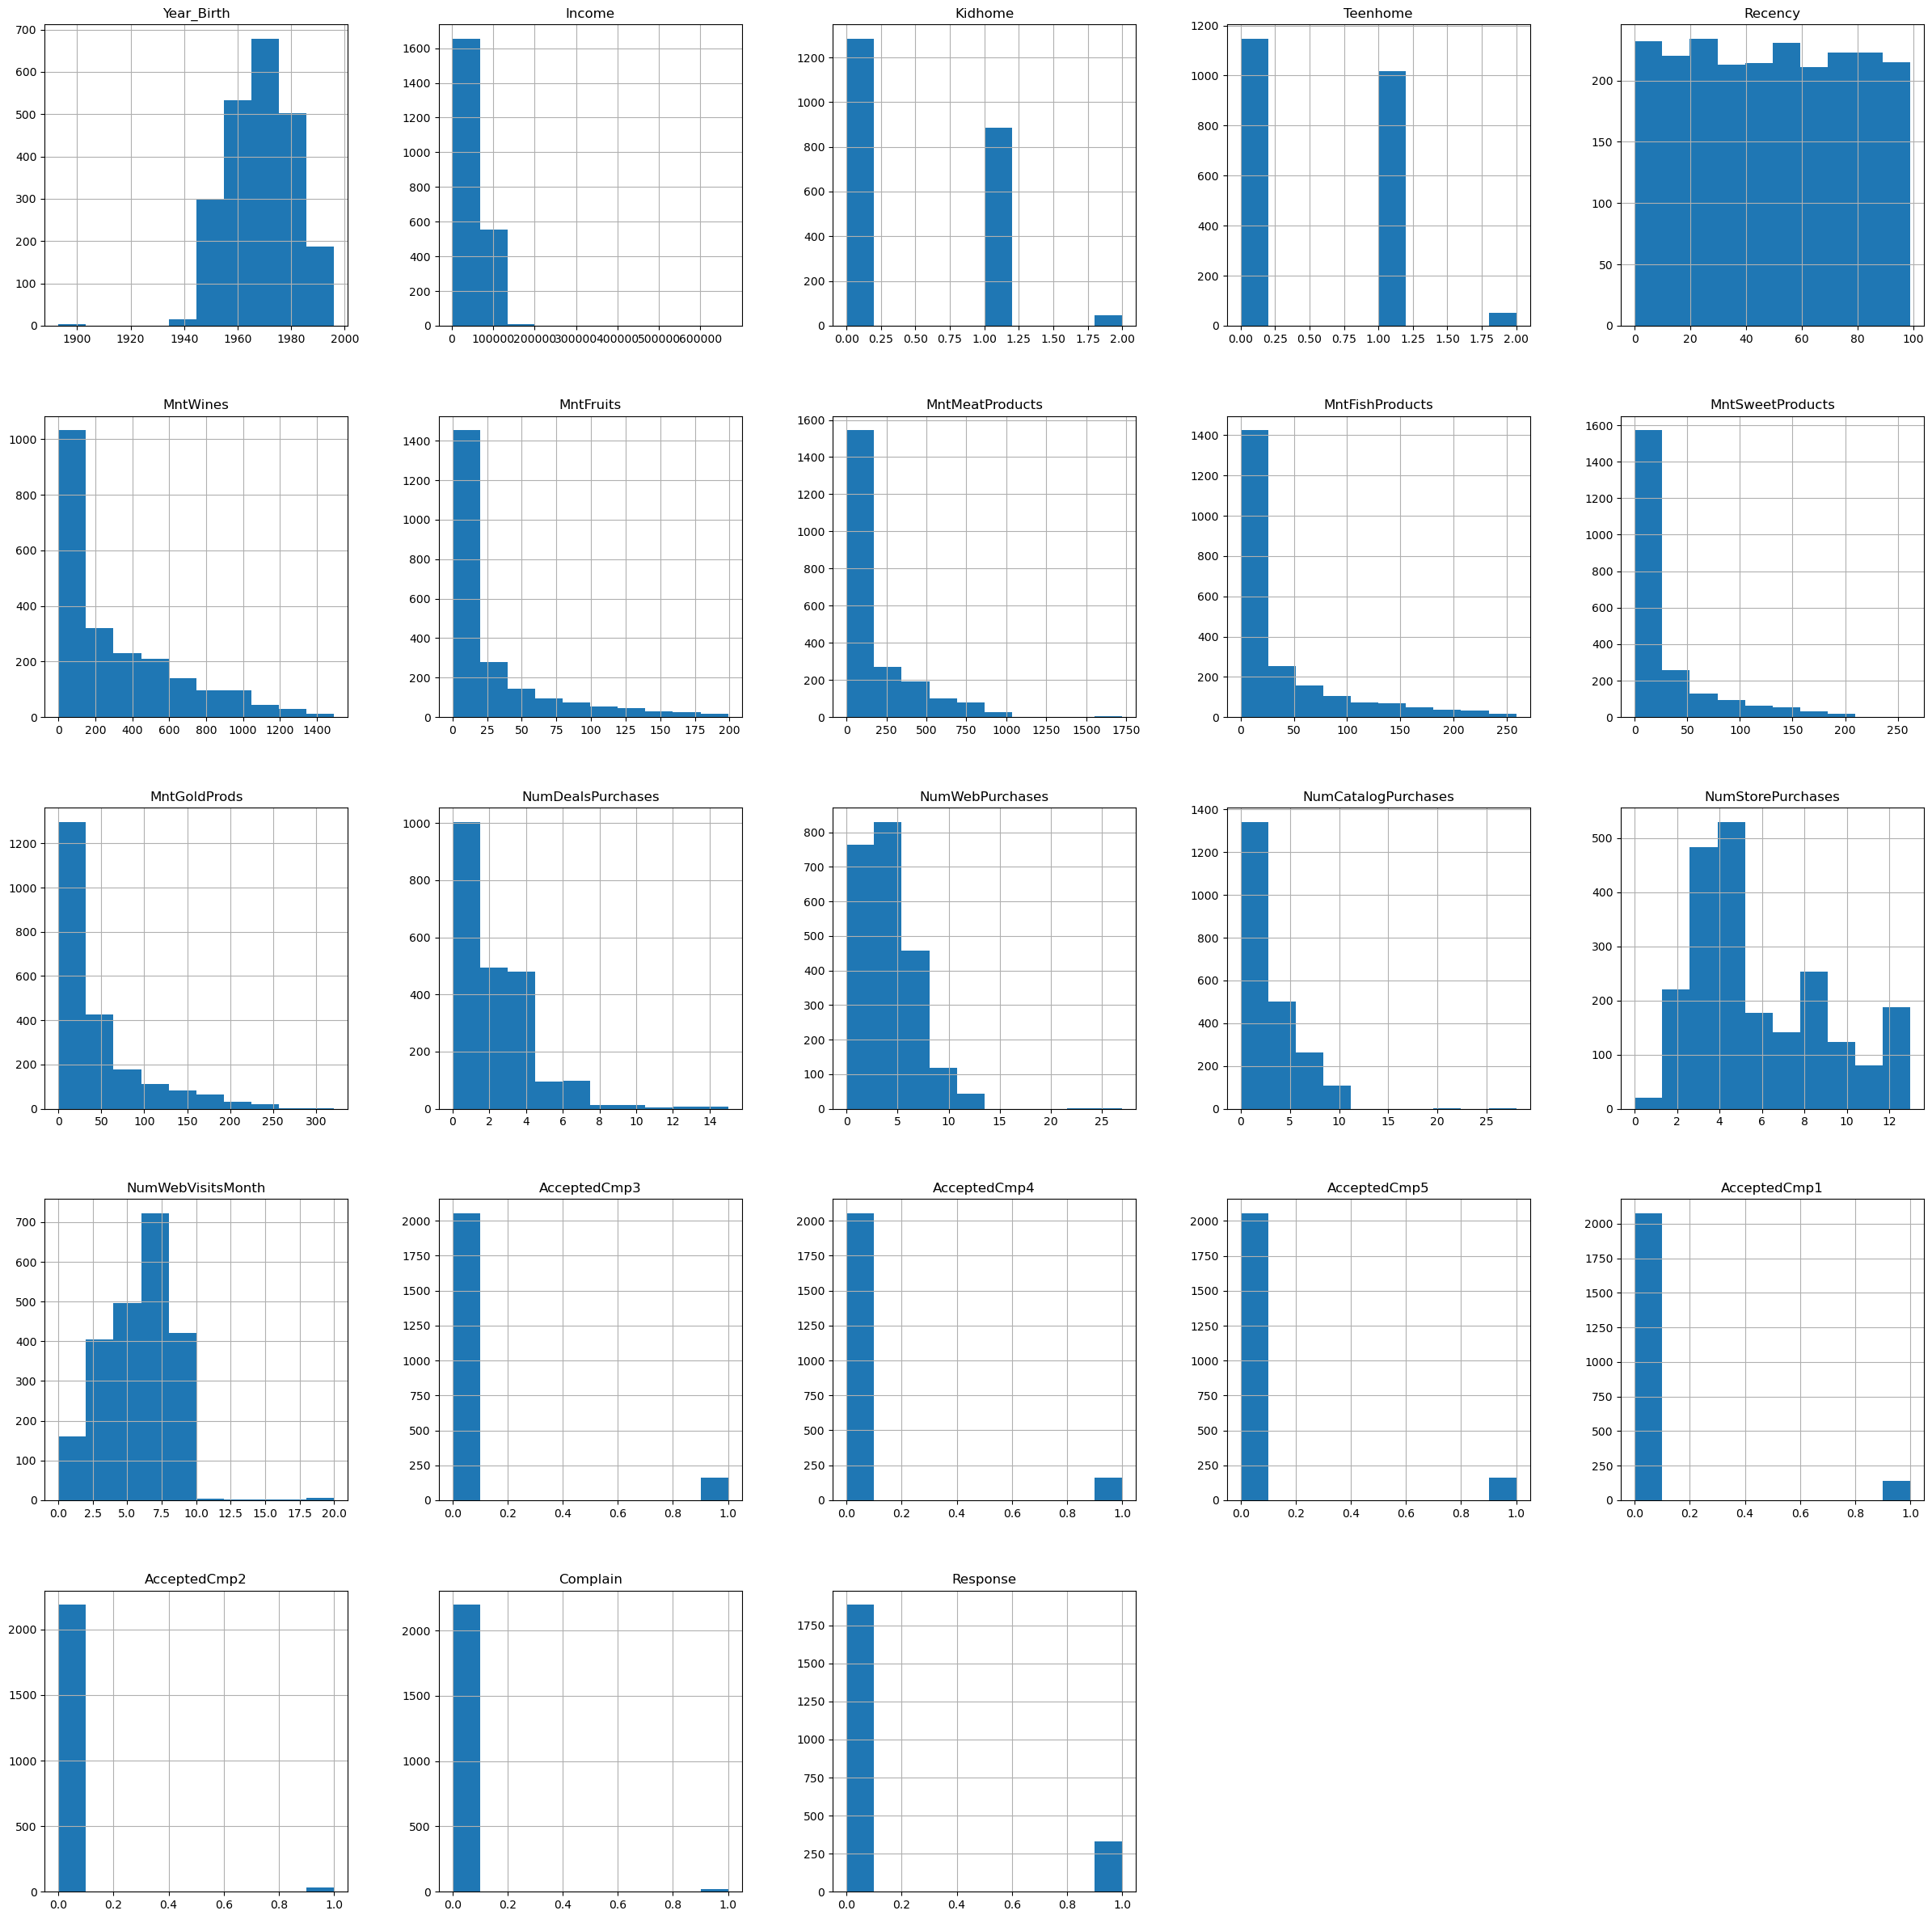

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))

plt.figure()
for i,column in enumerate(numerical_columns.columns):
    row = i // 5
    col = i % 5
    df.hist(column, ax =axes[row][col]) 
    
plt.delaxes(ax=axes[4][4]) 
plt.delaxes(ax=axes[4][3]) 
plt.tight_layout()
plt.show()

## Outliers

In [10]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2020-x)
df.drop(['Year_Birth'], axis = 1, inplace = True)

In [11]:
features = ['Income', 'MntWines', 'NumWebPurchases', 'NumWebVisitsMonth', 'Age']

In [12]:
features

for column in features:
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    
    df = df[df[column] < upper_fence]

In [13]:
df.Marital_Status.value_counts()

Marital_Status
Married     837
Together    557
Single      458
Divorced    226
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
unwanted_values = ['Alone','Absurd','YOLO']
df = df[~df['Marital_Status'].isin(unwanted_values)]

In [15]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,...,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000
mean,51385.993959,0.449349,0.508364,49.124535,291.382900,26.457714,162.703996,37.714684,26.994888,43.611524,...,5.830390,5.307156,0.072955,0.067844,0.063197,0.060409,0.009758,0.009294,0.144052,51.030669
std,20306.031518,0.538814,0.542841,28.901785,314.273757,39.918887,216.397941,54.968115,40.981343,50.663846,...,3.231577,2.277982,0.260124,0.251536,0.243374,0.238298,0.098324,0.095977,0.351224,11.640556
min,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,35178.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
50%,50954.000000,0.000000,0.000000,49.000000,172.500000,8.000000,67.000000,12.000000,8.000000,25.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
75%,67480.500000,1.000000,1.000000,74.000000,492.000000,33.000000,223.000000,50.000000,33.000000,56.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,105471.000000,2.000000,2.000000,99.000000,1230.000000,199.000000,1725.000000,259.000000,198.000000,249.000000,...,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000


# ANALYSIS

# Demographics Destribution

# Age

In [17]:
def categorize_age(age):
    if age >= 1981 and age < 1996:
        return '24-34'
    elif age >= 35 and age < 39:
        return '35-39'
    elif age >= 40 and age < 44:
        return '40-44'
    elif age >= 45 and age < 49:
        return '45-49'
    elif age >= 50 and age < 54:
        return '50-54'
    elif age >= 55 and age < 59:
        return '55-59'
    elif age >= 60 and age < 64:
        return '60-64'
    elif age >= 65 and age < 69:
        return '65-69'
    elif age >= 70:
        return '70+'

# Apply the categorize_age function to create AgeGroup column
df['AgeGroup'] = df['Age'].apply(categorize_age)

In [18]:
age_groups = df.AgeGroup.value_counts()
percentages = round((age_groups / age_groups.sum()) * 100,1)
age_destribution = pd.DataFrame({'Value':age_groups, 'Percentage':percentages})

In [19]:
def plotting_table(data_frame,table_no,table_title):
    fig = plt.figure(figsize = (8, 2))
    ax = fig.add_subplot(111)

    ax.table(cellText = data_frame.values,
              rowLabels = data_frame.index,
              colLabels = data_frame.columns,
              loc = "center"
             )
    
    ax.axis("off");

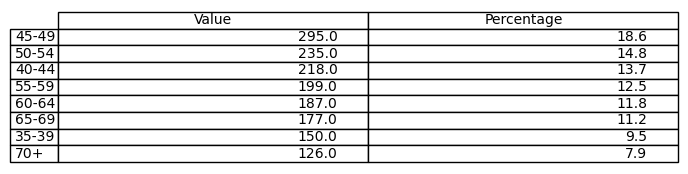

In [20]:
plotting_table(age_destribution,1, 'Age of respondents')

## Vizualisation

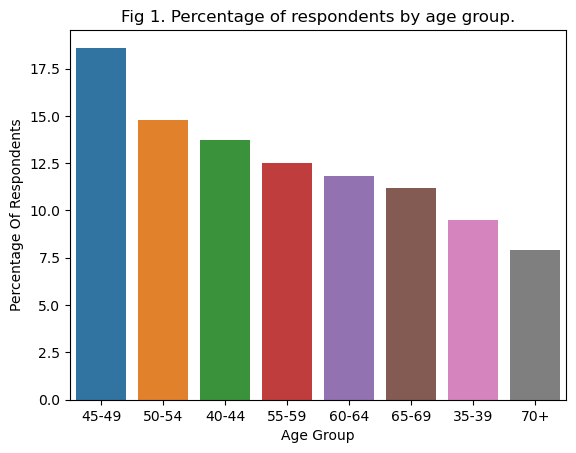

In [21]:
sns.barplot(age_destribution,x=age_destribution.index, y=age_destribution.Percentage)
plt.title('Fig 1. Percentage of respondents by age group.')
plt.xlabel('Age Group')
plt.ylabel('Percentage Of Respondents')
plt.show()

Table 1 shows that majority of the repondents are the 45-49 age group.

The table also depicts a highly uneven distribution, with the majority of respondents being the 45 - 49 age group (18 percent). the 50 - 54 group is the next most common age group (14 percent), followed by the 40 - 44 group (13 percent), the 55 - 59 group (12 percent), the 60 - 64 group (11 percent), the 65 - 69 group (10 percent), the 35 - 39 group (9 percent), the 24 - 34 group (8 percent), the 70 + group (7 percent), and finally the least common group, 80+ (0 percent).


# BACKGROUND CHARACTERISTICS OF RESPONDENT

I have to group the incomes for easy analysis.

In [22]:
labels = ['Lowest', 'Low', 'Medium', 'High', 'Highest']
df['Income Quintile'] = pd.qcut(df['Income'], q=5, labels=labels)

_, bins = pd.qcut(df['Income'], q=5, labels=labels, retbins=True)


## Income Quintiles:
    
- Lowest  = 2447.00 - 31977.80 
- Low = 31977.80 - 44322.60
- Medium = 44322.60 - 57898.20
- High = 57898.20 - 70991.40 
- Highest = 70991.40 - 105471.00

## Let's analyse the background characteristics

In [23]:
def calculate_percentage_counts(column):
    value_counts = column.value_counts()
    percentages = round((value_counts / len(column)) * 100, 1)
    result_df = pd.DataFrame({'Value': value_counts, 'Percentage': percentages})
    return result_df                            

In [24]:
education = calculate_percentage_counts(df['Education'])
marital_status = calculate_percentage_counts(df['Marital_Status'])
kid_home = calculate_percentage_counts(df['Kidhome'])
teen_home = calculate_percentage_counts(df['Teenhome'])
income_quintile = calculate_percentage_counts(df['Income Quintile'])
back_ground_char = [education,marital_status, kid_home, teen_home, income_quintile]

### Education

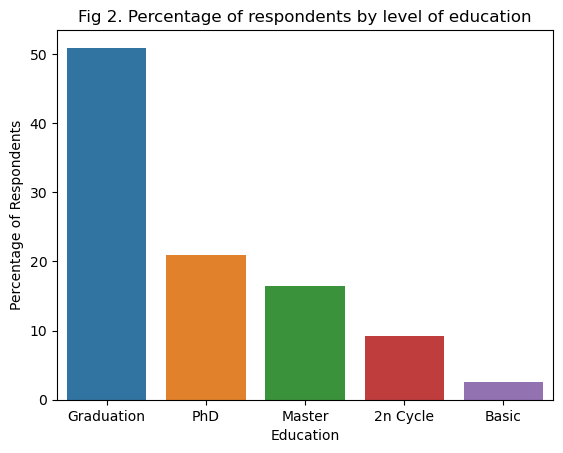

In [25]:
sns.barplot(education,x=education.index,y=education.Percentage)
plt.title('Fig 2. Percentage of respondents by level of education')
plt.ylabel('Percentage of Respondents')
plt.show()

### Marital Status

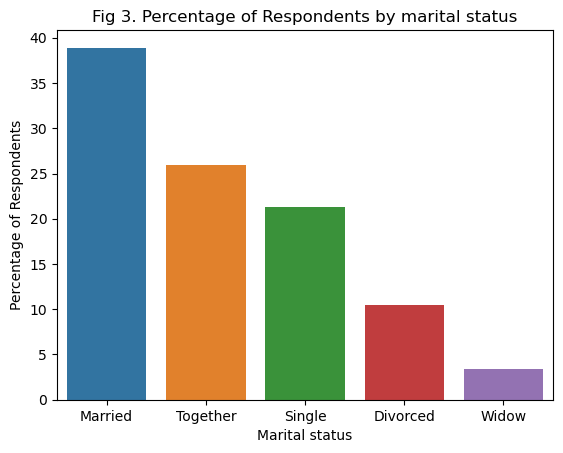

In [26]:
sns.barplot(marital_status,x=marital_status.index,y=marital_status.Percentage)
plt.title('Fig 3. Percentage of Respondents by marital status')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Marital status')
plt.show()

Table 2: The respondents appears to be well-educated. Specifically, 51 percent hold a graduate-level degree. Among them, 21 percent have earned a PhD, 17 percent have a master's degree, 9 percent have completed a second cycle degree, and 3 percent have only a basic education.


it also shows the marital status distribution of the population. 
According to the data, 39 percent are married, 26 percent are together, 21 percent are single, 
11 percent are divorced, 3 percent are widowed.

Household Composition of Respondents
The respondents tabulation indicates that 57 percent have no kid at home, 41 percent have 1  kid at home, 2 percent have 2 kids at home. 51 percent have 0 teenager at home, 46 percent have 1 teenager at home, 2 percent have one teenager at home.

The wealth quintiles seems to be evely distributed, there is an equal amount of respondents in every income quintile.

### Kidhome

In [27]:
kid_home = calculate_percentage_counts(df['Kidhome'])
teen_home = calculate_percentage_counts(df['Teenhome'])
income_quintile = calculate_percentage_counts(df['Income Quintile'])

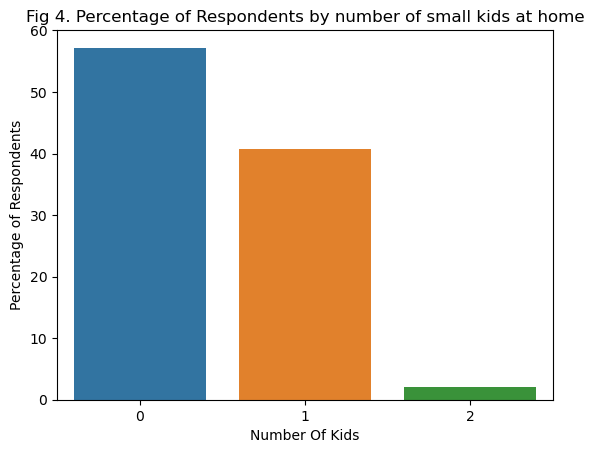

In [28]:
sns.barplot(kid_home,x=kid_home.index,y=kid_home.Percentage)
plt.title('Fig 4. Percentage of Respondents by number of small kids at home')

plt.ylabel('Percentage of Respondents')
plt.xlabel('Number Of Kids')
plt.show()

### Teenhome

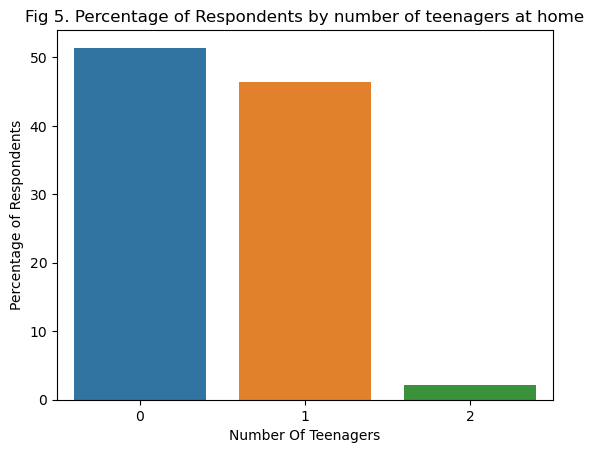

In [29]:
sns.barplot(teen_home,x=teen_home.index,y=teen_home.Percentage)
plt.title('Fig 5. Percentage of Respondents by number of teenagers at home')

plt.ylabel('Percentage of Respondents')
plt.xlabel('Number Of Teenagers')
plt.show()

### Income

/Users/mahloribaloyi/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


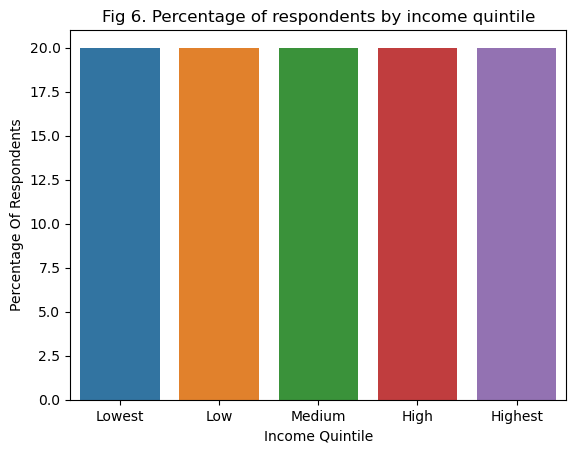

In [30]:
sns.barplot(income_quintile,x=income_quintile.index, y=income_quintile.Percentage)
plt.title('Fig 6. Percentage of respondents by income quintile')
plt.ylabel('Percentage Of Respondents')
plt.show()

# Variable and response rate relationship

## Response

In [31]:
df['Response'].value_counts()

Response
0    1842
1     310
Name: count, dtype: int64

In [32]:
313/2159*100

14.497452524316815

15 percent of the respondents from the last campaign accepted the offer.

## Response vs Age_group

In [33]:
response_by_age_group = df.groupby(['AgeGroup','Response']).size().unstack(fill_value=0)
response_by_age_group_percentage = round(response_by_age_group.div(response_by_age_group.sum(axis=1), axis=0) * 100,1)
response_by_age_group_percentage

Response,0,1
AgeGroup,,
35-39,75.3,24.7
40-44,88.5,11.5
45-49,84.7,15.3
50-54,85.1,14.9
55-59,89.9,10.1
60-64,88.8,11.2
65-69,85.3,14.7
70+,78.6,21.4


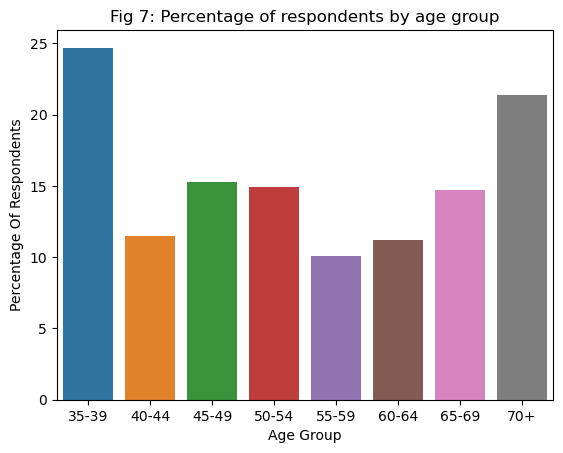

In [34]:
sns.barplot(response_by_age_group_percentage, x=response_by_age_group_percentage.index, y=response_by_age_group_percentage[1])
plt.title('Fig 7: Percentage of respondents by age group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Of Respondents')
plt.show()

The majority of the respondents who accepted the offers are 35-39(25 percent),followed by 70+ (21 percernt), 45-49(16 percent), 50-54 (15 percent), 65-69 (15 percent), 24-34 (14 percent), 40-44 (12 percent), 60 - 64(11 percent), and finally 55-59 (10) percent.

The majority of the age group of respondents who accepted the offer is very low in overall population. 

## Response vs Education

In [35]:
response_by_education = df.groupby(['Education','Response']).size().unstack(fill_value=0)

response_by_education_percentage = round(response_by_education.div(response_by_education.sum(axis=1), axis=0) * 100,1)

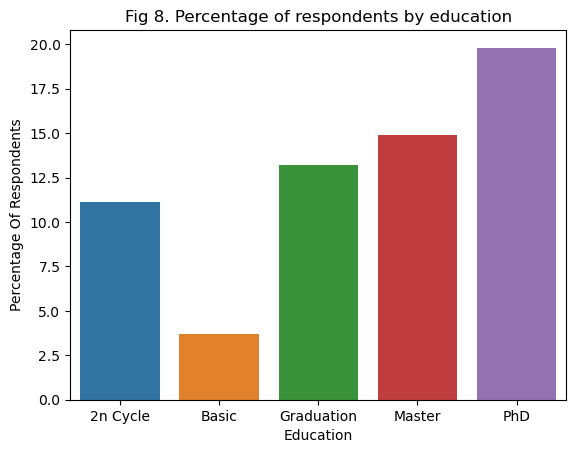

In [36]:
sns.barplot(response_by_education_percentage,x=response_by_education_percentage.index,y=response_by_education_percentage[1])
plt.title('Fig 8. Percentage of respondents by education')
plt.ylabel('Percentage Of Respondents')
plt.show()

From the information provided, there appears to be a trend suggesting that respondents with higher education levels, especially those with a PhD, were more likely to accept the last campaign offer. Specifically, 20 percent of those with a PhD accepted the offer, followed by 15 percent with a master’s degree, 13 percent with a graduate-level education, and 11 percent with a second-cycle education. This trend indicates that acceptance rates tend to be higher among those with more advanced educational qualifications.

## Response vs Marital Status

In [37]:
response_by_marital_status = df.groupby(['Marital_Status', 'Response']).size().unstack(fill_value=0)

response_by_marital_status_percentage = round(response_by_marital_status.div(response_by_marital_status.sum(axis=1), axis=0) * 100,1)

In [38]:
response_by_marital_status_percentage

Response,0,1
Marital_Status,,
Divorced,79.6,20.4
Married,88.9,11.1
Single,78.2,21.8
Together,90.1,9.9
Widow,78.4,21.6


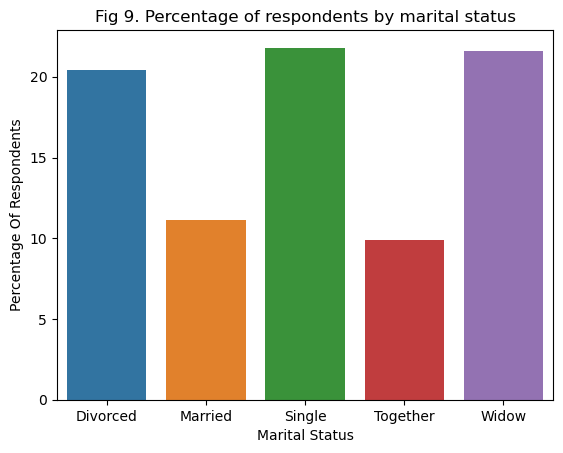

In [39]:
sns.barplot(response_by_marital_status_percentage,x=response_by_marital_status_percentage.index,y=response_by_marital_status_percentage[1])
plt.title('Fig 9. Percentage of respondents by marital status')
plt.ylabel('Percentage Of Respondents')
plt.xlabel('Marital Status')
plt.show()

Those who don't have partners show a trend of most likely accepting the offer, in the single and widow category 22 percent accepeted the offer, in devorced 20 percent, in married 11 percent, in together 10 percent.

The groups that have partners are low when compared to the overall population.

In [40]:

#Also when you look at the first(35-39) and second(70+) age groups you can say it's almost tempting to start a hypothesis that the 35-39 age groups are single and the 70+ are most likely widowed.


## Response vs no of Kids at home 

In [41]:
kid_home = df.groupby(['Kidhome', 'Response']).size().unstack(fill_value=0)

kid_home_percentage = round(kid_home.div(kid_home.sum(axis=1), axis=0) * 100,1)

print(kid_home_percentage)

Response     0     1
Kidhome             
0         83.8  16.2
1         87.7  12.3
2         95.7   4.3


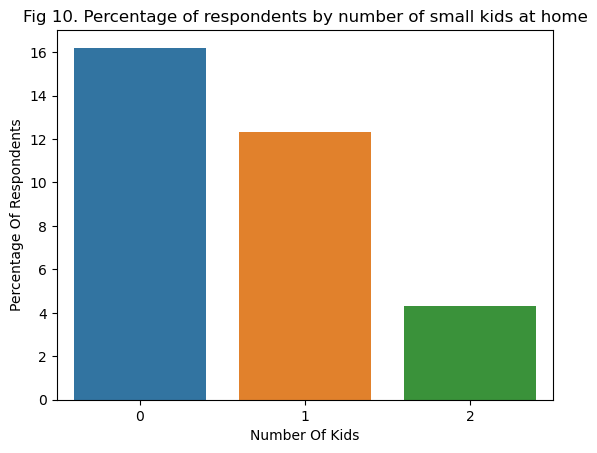

In [42]:
sns.barplot(kid_home_percentage,x=kid_home_percentage.index,y=kid_home_percentage[1])
plt.title('Fig 10. Percentage of respondents by number of small kids at home')
plt.ylabel('Percentage Of Respondents')
plt.xlabel('Number Of Kids')
plt.show()

Majority have no kid(16 percent), followed by 1 kid(12 percent), and then 2 kids(4 percent)

## Response vs no of teens at home


In [43]:
teen_home = df.groupby(['Teenhome', 'Response']).size().unstack(fill_value=0)
print(teen_home)
teen_home_percentage = round(teen_home.div(teen_home.sum(axis=1), axis=0) * 100,1)
print('--- ---'*17)
print(teen_home_percentage)

Response    0    1
Teenhome          
0         887  219
1         911   87
2          44    4
--- ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ---
Response     0     1
Teenhome            
0         80.2  19.8
1         91.3   8.7
2         91.7   8.3


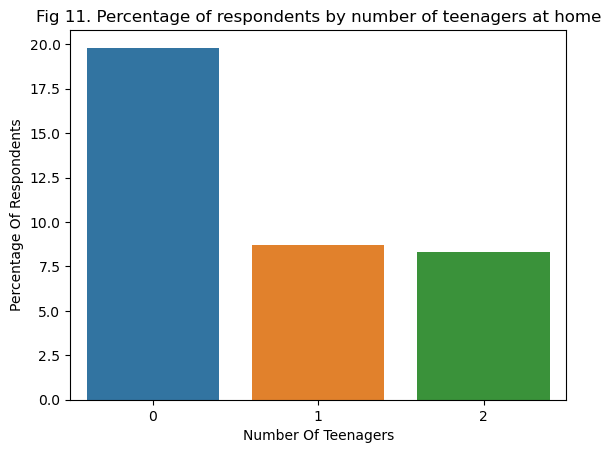

In [44]:
sns.barplot(teen_home_percentage,x=teen_home_percentage.index,y=teen_home_percentage[1])
plt.title('Fig 11. Percentage of respondents by number of teenagers at home')
plt.ylabel('Percentage Of Respondents')
plt.xlabel('Number Of Teenagers')
plt.show()

The same trend is observed in the kid table,Majority have no children. 

## Response vs Income 

In [45]:
income_by_responce = df.groupby(['Income Quintile', 'Response'],observed=False).size().unstack(fill_value=0)

income_by_responce_percentage = round(income_by_responce.div(income_by_responce.sum(axis=1), axis=0) * 100,1)

print(income_by_responce_percentage)

Response            0     1
Income Quintile            
Lowest           89.6  10.4
Low              86.7  13.3
Medium           89.3  10.7
High             90.0  10.0
Highest          72.4  27.6


/Users/mahloribaloyi/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


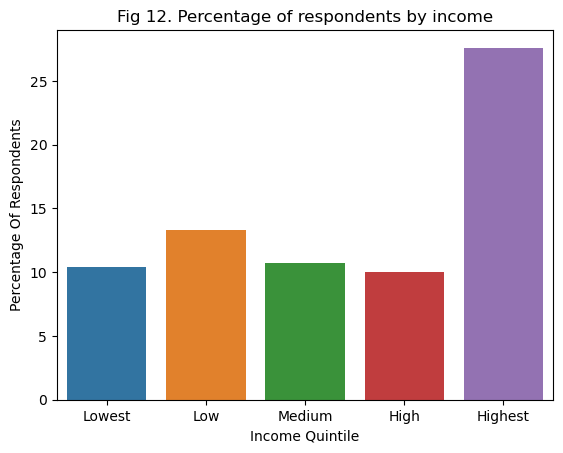

In [46]:
sns.barplot(income_by_responce_percentage,x=income_by_responce_percentage.index,y = income_by_responce_percentage[1])
plt.title('Fig 12. Percentage of respondents by income')
plt.ylabel('Percentage Of Respondents')
plt.xlabel('Income Quintile')
plt.show()

Majority were those with the highest income(28 percent), followed by low income(13 percent), medium income(11 percent), lowest income(10 percent), high income(10 percent).

In [47]:
#of all the respondents whose income fell in the highest category 28 percent of them accepted the offer meaning if the respondent accepted the offer there was  28% of them falling under the highest income category

# Other Relationships.

In [48]:
edu_dummies = pd.get_dummies(df['Education'],dtype=int)
marital_dummies = pd.get_dummies(df['Marital_Status'], dtype = int)
df1=df
df = pd.concat([df, edu_dummies],axis=1)
df = pd.concat([df, marital_dummies],axis=1)
df.drop(['Education','Marital_Status','AgeGroup','Income Quintile'], axis = 1, inplace = True)
corr = df.corr(method='pearson')

<Axes: >

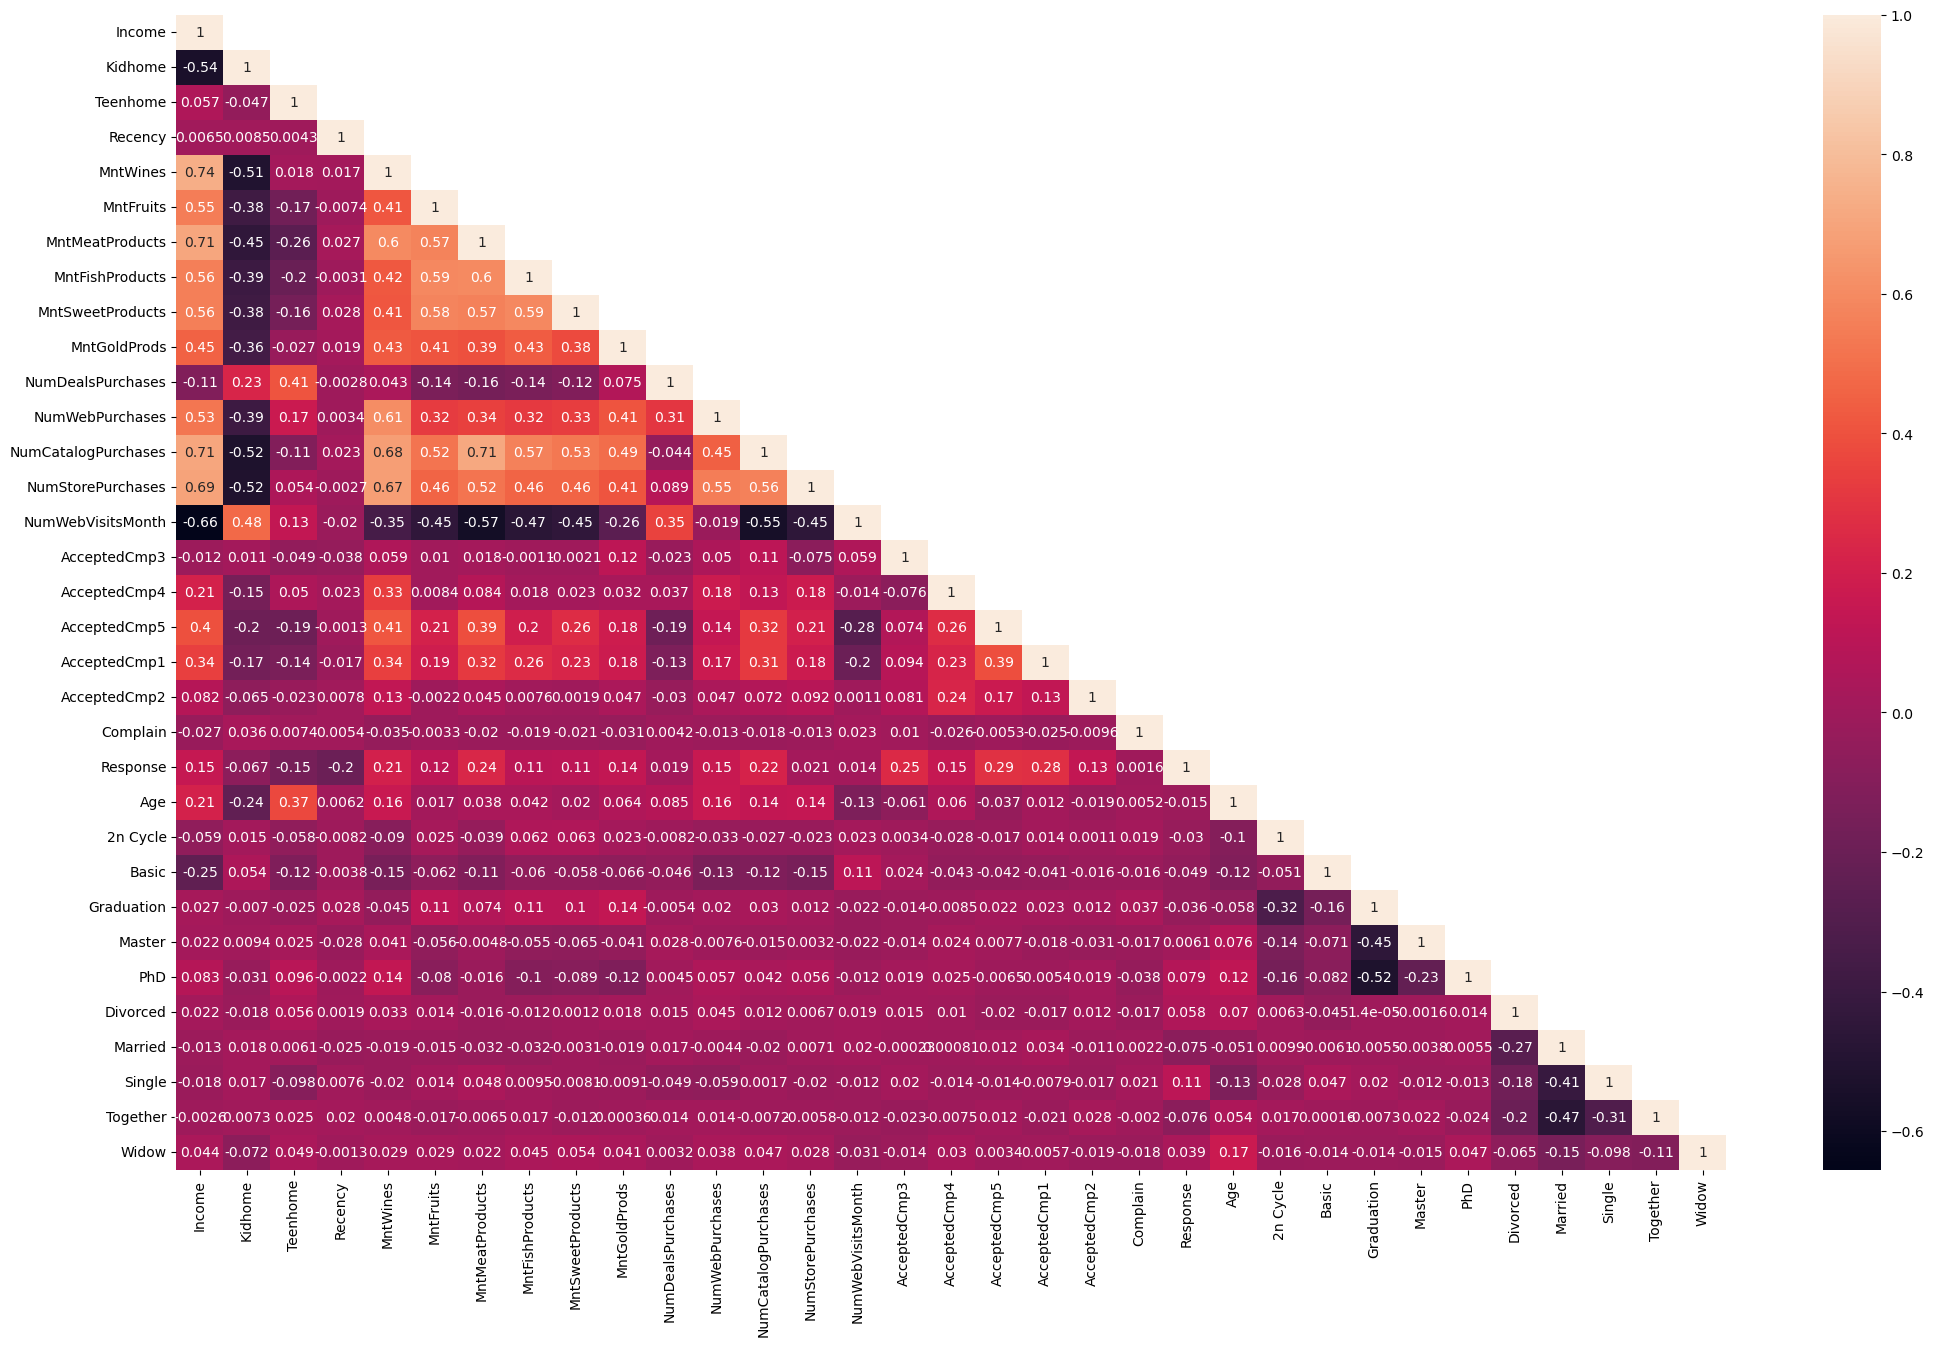

In [49]:
plt.figure(figsize=(25,15))
masker = np.triu(np.ones_like(corr),k=1).astype(dtype = bool)
sns.heatmap(corr,annot=True,mask=masker)

 ### Strong positive correlation.

Income :
- 'MntWines' - strong
- 'MntFruits', - weak
- 'MntMeatProducts', - strong
- 'MntFishProducts', - weak
- 'MntSweetProducts', - weak
- 'MntGoldProds', - weak
- 'NumWebPurchases', - weak
- 'NumCatalogPurchases', - strong
- 'NumStorePurchases', - strong

kidhome :
- Number of visits to company's web site in the last month - weak.

MntWines: 
- 'MntMeatProducts', - weak
- 'NumWebPurchases', - weak
- 'NumCatalogPurchases', - strong
- 'NumStorePurchases', - strong

MntSweetProducts
- 'MntMeatProducts', - strong
- 'MntFishProducts', - weak
- 'MntSweetProducts', - weak

Number of purchases made using catalog is positively correlated with amount spent on meat products in the last 2 years.

### Strong negative correlation.

Income is  negatively correlated with the following features.
- Number of visits to company's web site in the last month.
- Number of small children in customer's household.

Number of visits to company's web site in the last month is negatively correlated with number of purchases made using catalog.

Number of visits to company's web site in the last month is negatively correlated with amount of meat products. 


# Profiles

## Customer Segmentation Based on Behaviors

- Segmentation Criteria:
        Past Campaign Responses: Customers who have previously responded to campaigns might be more likely to respond again.
- Spending Habits: Higher spending on certain product categories could indicate a higher likelihood of responding.
- Demographics: Age, income, education, and household composition are important factors.

In [50]:
# Select features for clustering
features = df

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features,)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=43, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_summary = round(df.groupby('Cluster').mean())
cluster_summary.T


Cluster,0,1,2,3
Income,81929.0,57192.0,33784.0,72297.0
Kidhome,0.0,0.0,1.0,0.0
Teenhome,0.0,1.0,0.0,0.0
Recency,50.0,49.0,49.0,50.0
MntWines,794.0,432.0,37.0,498.0
MntFruits,59.0,20.0,5.0,73.0
MntMeatProducts,483.0,124.0,22.0,421.0
MntFishProducts,81.0,26.0,8.0,106.0
MntSweetProducts,70.0,19.0,5.0,72.0
MntGoldProds,79.0,56.0,15.0,78.0


Segmentation

The majority of group with the highest level of income shows to be spending a lot on products. They have the lowest number of website visits a month.
They seem to prefer in store purchase, They have the lowest number of deals and catalog purchases, Majority have no child at home.

0

Income 	75181.0 
Kidhome 	0.0 
Teenhome 	0.0 
MntWines 	562.0
MntFruits 	71.0 
MntMeatProducts 	449.0 
MntFishProducts 	101.0 
MntSweetProducts 	73.0 
MntGoldProds 	78.0 
NumDealsPurchases 	1.0 
NumWebPurchases 	5.0 
NumCatalogPurchases 	6.0 
NumStorePurchases 	9.0 
NumWebVisitsMonth 	3.0 
Age 	52.0 
Graduation 	1.0 

1

Income 	29582.0 
Kidhome 1.0 
Teenhome 	0.0 
MntWines 	33.0 
MntFruits 	7.0
MntMeatProducts 	27.0 
MntFishProducts  	10.0 
MntSweetProducts  	7.0 
MntGoldProds  	18.0 
NumDealsPurchases  	2.0
NumWebPurchases 	2.0 	
NumCatalogPurchases 	1.0 
NumStorePurchases 	4.0 	
NumWebVisitsMonth 	7.0 	
Age 42.0 	
Graduation 	1.0 

2


Income 	59510.0 
Kidhome 0.0 
Teenhome 	0.0 
MntWines  	506.0 
MntFruits  	24.0 
MntMeatProducts  	147.0 
MntFishProducts 	32.0 
MntSweetProducts	24.0 
MntGoldProds  	64.0 
NumDealsPurchases 	4.0 
NumWebPurchases  	7.0 
NumCatalogPurchases  	3.0 
NumStorePurchases 	8.0 
NumWebVisitsMonth  	6.0 
Age 55.0 	56.0


3


Income 	41518.0 
Kidhome 	1.0
Teenhome 	1.0 
MntWines 	68.0
MntFruits  	4.0
MntMeatProducts 	26.0
MntFishProducts  	6.0
MntSweetProducts 	4.0
MntGoldProds  	15.0
NumDealsPurchases 	2.0
NumWebPurchases 	2.0
NumCatalogPurchases 	1.0
NumStorePurchases 	4.0
NumWebVisitsMonth  	6.0
Age 56.0

# Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Select features and target
X = df.drop('Response',axis=1)
y = df['Response']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))


Accuracy: 0.891640866873065
AUC: 0.647155315614618


In [52]:
pred_test = pd.DataFrame(y_pred,columns=['Response'])

In [53]:
from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE = {rmse_test}')

RMSE = 0.3291794846689796


In [59]:
model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [54]:
Accuracy: 0.891640866873065
AUC: 0.647155315614618
RMSE = 0.3291794846689796